In [1]:
import myutil as mu
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim



--- 
 - 단순 선형 회귀 클래스로 구현하기 
   - 이제 모델을 클래스로 구현한 코드를 보겠습니다. 달라진 점은 모델을 클래스로 구현했다는 점 뿐입니다. 다른 코드는 전부 동일합니다. 
   - 클래스(class) 형태의 모델은 nn.Module 을 상속받습니다. 
   - 그리고 __init__()에서 모델의 구조와 동적을 정의하는 생성자를 정의합니다. 
   - 이는 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으호 호출됩니다. 
   - super() 함수를 부르면 여기서 만든 클래스는 nn.Module 클래스의 속성들을 가지고 초기화 됩니다. 
   - foward() 함수는 모델이 학습데이터를 입력받아서 forward 연산을 진행시키는 함수입니다. 
   - 이 forward() 함수는 model 객체를 데이터와 함께 호출하면 자동으로 실행이됩니다. 
   - 예를 들어 model이란 이름의 객체를 생성 후, model(입력 데이터)와 같은 형식으로 객체를 호출하면 자동으로 forward 연산이 수행됩니다. 
   - H(x) 식에 입력 x로부터 예측된 y를 얻는 것을 forward 연산이라고 합니다. 


-------------------------------------------------------------------------------- 
epoch :    0/2000 
cost : 25.381737 
accuracy : 0.00 

-------------------------------------------------------------------------------- 
epoch :  100/2000 
cost : 0.010823 
accuracy : 0.97 

-------------------------------------------------------------------------------- 
epoch :  200/2000 
cost : 0.006688 
accuracy : 0.97 

-------------------------------------------------------------------------------- 
epoch :  300/2000 
cost : 0.004133 
accuracy : 0.98 

-------------------------------------------------------------------------------- 
epoch :  400/2000 
cost : 0.002554 
accuracy : 0.98 

-------------------------------------------------------------------------------- 
epoch :  500/2000 
cost : 0.001578 
accuracy : 0.99 

-------------------------------------------------------------------------------- 
epoch :  600/2000 
cost : 0.000975 
accuracy : 0.99 

-----------------------------------------------

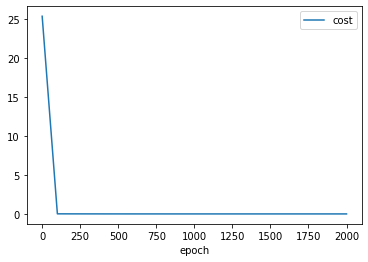

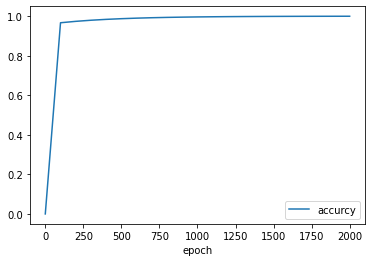


model : 
    LinealRegressionModel(
      (linear): Linear(in_features=1, out_features=1, bias=True)
    ) 
    linear.weight    torch.Size([1, 1])
        tensor([[1.9988]])
    linear.bias    torch.Size([1])
        tensor([0.0028])



In [2]:

class LinealRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinealRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=0.01)
nb_epoches = 2000

# 훈련 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

mu.plt_init()

for epoch in range(nb_epoches + 1):
    predication = model(x_train)
    cost = F.mse_loss(predication, y_train)
    accuracy = mu.get_regression_accuracy(predication, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0 :
        mu.log_epoch(epoch, nb_epoches, cost, accuracy)

mu.plt_show()
mu.log("model", model)
